In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
data=pd.read_csv("Transformed_Housing_Data2.csv")

In [2]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900,3,1.00,1180,5650,1.0,0,7,1180,0,...,0,0,0,0,0,0,0,0,0,0
1,538000,3,2.25,2570,7242,2.0,0,7,2170,400,...,0,0,1,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,6,770,0,...,0,0,1,0,0,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,7,1050,910,...,0,0,0,1,0,0,0,0,0,0
4,510000,3,2.00,1680,8080,1.0,0,8,1680,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
data['mean_sales']=data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [4]:
import matplotlib.pyplot as plt

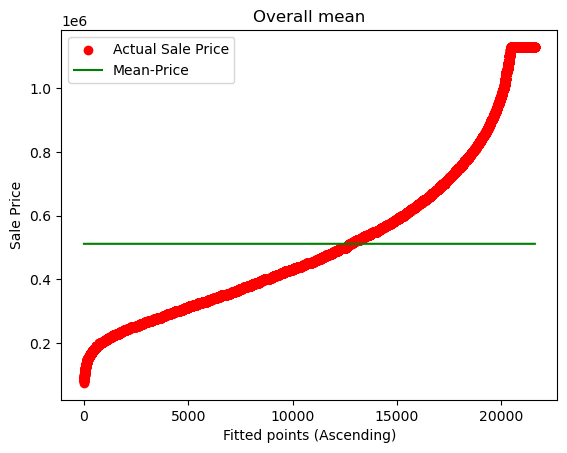

In [6]:
plt.figure(dpi=100)   #defining the resolution of the image
k=range(0,len(data))    #acts as an index for the data which we'll use on x-axis
plt.scatter(k,data['Sale_Price'].sort_values(),color='red',label='Actual Sale Price')
plt.plot(k,data['mean_sales'].sort_values(),color='green',label='Mean-Price')
plt.xlabel("Fitted points (Ascending)")
plt.ylabel("Sale Price")
plt.title("Overall mean")
plt.legend()

In [7]:
#calculating avg sale price wrt to the overall grade of the house:
grades_mean=data.pivot_table(values="Sale_Price", columns="Overall Grade", aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [8]:
# making new column:
data['grade_mean']=0
# for every grade fill its mean price in a new column`
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
    
data['grade_mean'].head()

C:\Users\HP\AppData\Local\Temp\ipykernel_4136\2242277023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
C:\Users\HP\AppData\Local\Temp\ipykernel_4136\2242277023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
C:\Users\HP\AppData\Local\Temp\ipykernel_4136\2242277023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [10]:
gradewise_list=[]
for i in range(1,11):
    k=data['Sale_Price'][data['Overall Grade'] == i]
    gradewise_list.append(k)

In [16]:
gradewise_list

[19450    142000
 Name: Sale_Price, dtype: int64,
 4409     1129575
 4809     1129575
 5449     1129575
 6039     1129575
 7033     1129575
 7250     1129575
 7905     1129575
 9252     1129575
 10371    1129575
 13409    1129575
 13698    1129575
 14554    1129575
 19015    1129575
 Name: Sale_Price, dtype: int64,
 1147     75000
 3221    262000
 5830    280000
 Name: Sale_Price, dtype: int64,
 348      299000
 463       80000
 1064     140000
 3580     355000
 3883     248000
 4866     228000
 5202     352000
 6478     217000
 7971     120000
 8595     205000
 8617     355000
 8621     325000
 9639     330000
 9792     435000
 11498    229050
 11586    188000
 12073    156000
 13999    130000
 14089    152000
 14579     95000
 15038    200000
 15710    150000
 16338    100000
 16528     90000
 17392    145000
 18050    247000
 18164    230000
 18377    265000
 19342    151000
 Name: Sale_Price, dtype: int64,
 36       550000
 165      269950
 261      425000
 262      369900
 409    

In [11]:
classwise_list=[]
for i in range(1,11):
    k=data['Sale_Price'][data['Overall Grade'] == i]
    classwise_list.append(k)

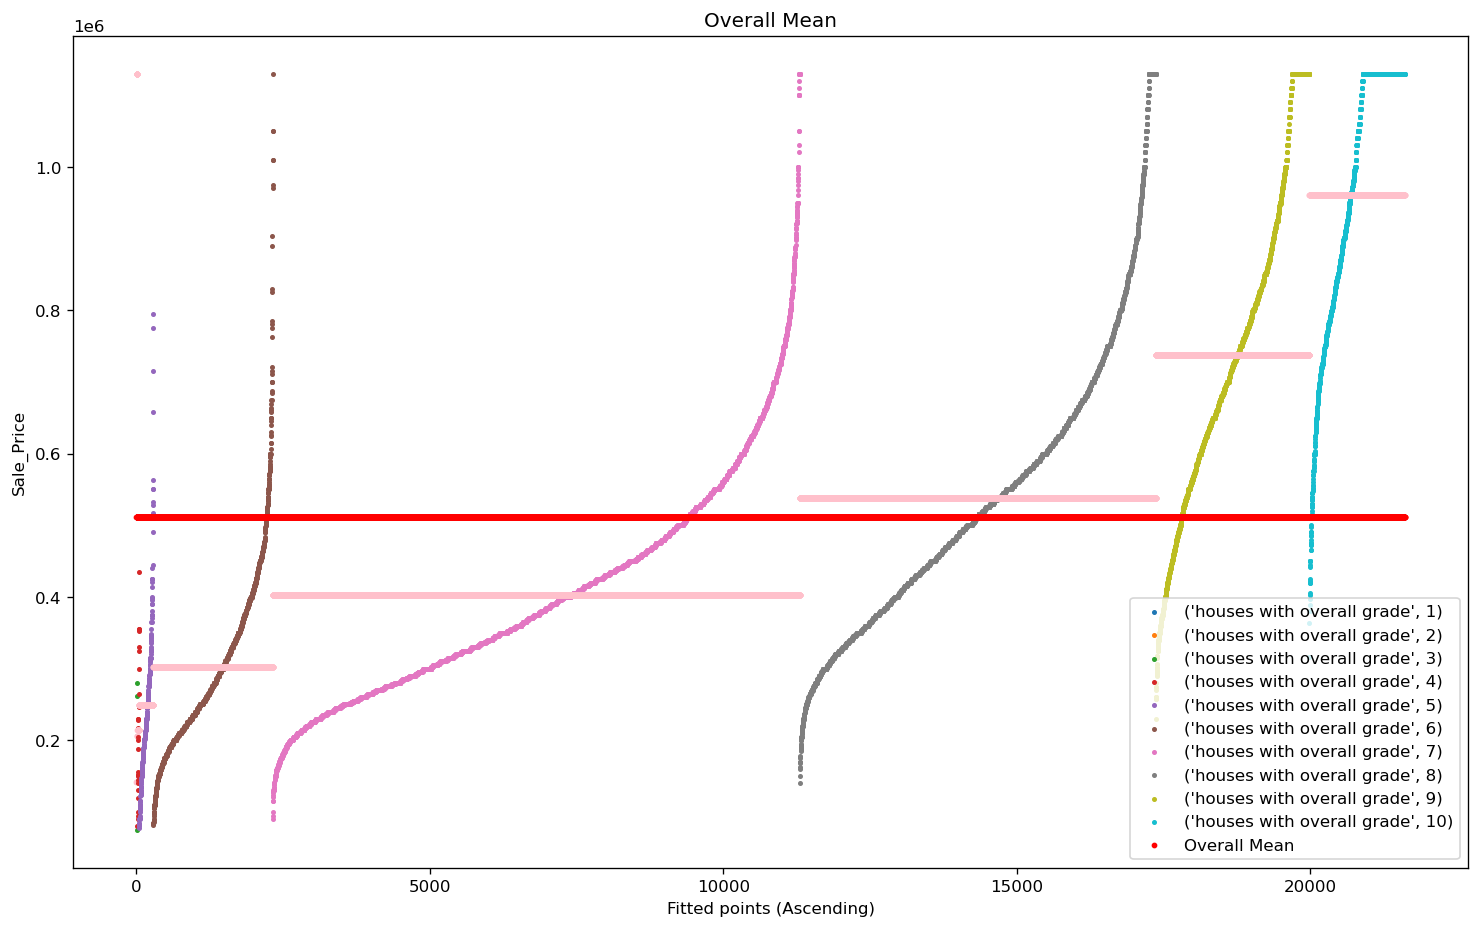

In [15]:
plt.figure( dpi=120, figsize=(15,9))

#Plotting sale price gradewise
# z variable is for x axis
z=0
for i in range(1,11):
    #defining x axis using z
    points=[k for k in range(z,z+len(classwise_list[i-1]))]
    #plotting
    plt.scatter(points, classwise_list[i-1].sort_values(),
               label = ('houses with overall grade',i), s=4)   #s=size of markers
    #plotting gradewise mean
    plt.scatter(points, [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
                s=6, color='pink')
    z=max(points)+1
    
# plotting overall mean
plt.scatter([q for q in range(0,z)],
           data['mean_sales'],
           color='red',
           label='Overall Mean',
           s=6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale_Price')
plt.title("Overall Mean")
plt.legend(loc=4)

Residual Plot :-

In [17]:
mean_difference=data['mean_sales'] - data["Sale_Price"]
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

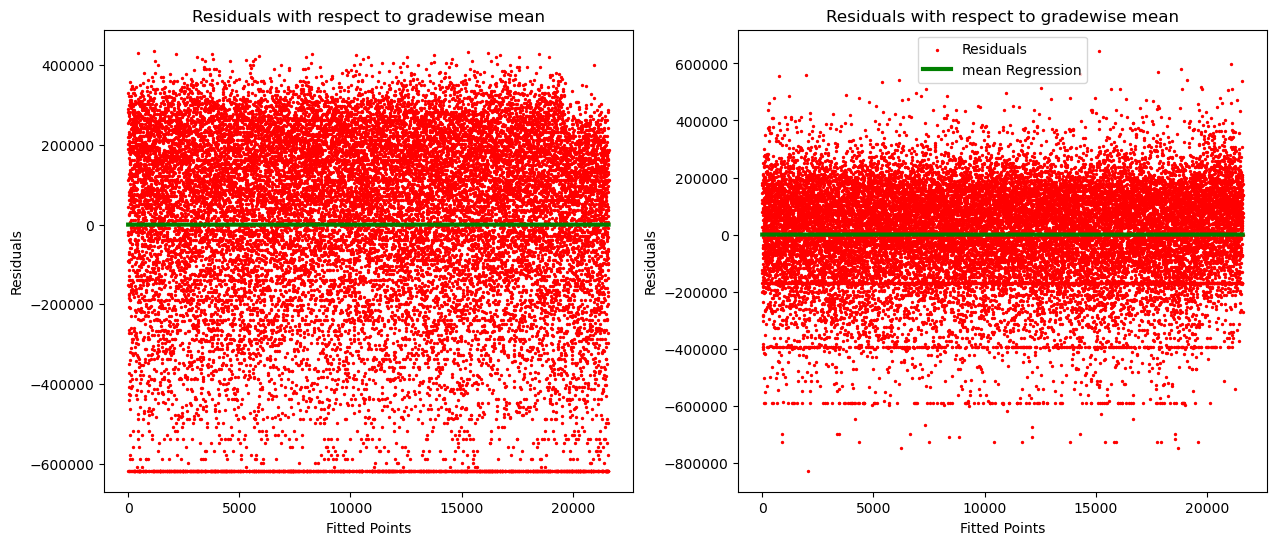

In [19]:
k = range(0,len(data))
l = [0 for i in range(len(data))] #list of zeros which will represent residual of a perfect model where predictions are exactly same as the actuals

plt.figure(figsize = (15,6), dpi=100)

plt.subplot(1,2,1)
plt.scatter(k, mean_difference, color='red', label='Residuals', s=2)
plt.plot(k, l, color='green', label='mean Regression', linewidth=3)
plt.xlabel("Fitted Points")
plt.ylabel('Residuals')
plt.title('Residuals with respect to gradewise mean')

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color='red', label='Residuals', s=2)
plt.plot(k, l, color='green', label='mean Regression', linewidth=3)
plt.xlabel("Fitted Points")
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals with respect to gradewise mean')

plt.legend()

In [ ]:
# second model is closer to the zero line ,hence it is the perfect model
# first model has a larger spread of residuals as compared to the second model

MODEL EVALUATION METRICS:

In [20]:
#Finding out mean error
cost = sum(mean_difference)/len(data)
print(round(cost,7))

0.0


In [ ]:
#above output is misleading as it shows no error

In [21]:
Y = data['Sale_Price']
Y_hat1=data['mean_sales']
Y_hat2=data['grade_mean']
n=len(data)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [22]:
cost_mean=sum(abs(Y_hat1 - Y))/n
cost_mean

199168.78146839526

In [23]:
cost_grade_mean=sum(abs(Y_hat2 - Y))/n
cost_grade_mean

137081.70298203363

In [ ]:
#this confirms model 2 is better than model 1 as the error is higher in model1 

In [25]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
cost_grade_mean= mean_absolute_error(Y_hat2, Y)
cost_grade_mean

137081.7029820291

In [27]:
#mean_squared error
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1,Y)
cost_grade_mean = mean_squared_error(Y_hat2,Y)
cost_mean, cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [28]:
# root mean square error:
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean = mean_squared_error(Y_hat2,Y)**0.5
cost_mean, cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [29]:
# calculating r^2
Y = data['Sale_Price']
Y_bar=data['mean_sales']
Y_hat=data['grade_mean']
n=len(data)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [1]:
mse_mean = mean_squared_error(Y_bar,Y)
mse_mean

mse_model = mean_squared_error(Y_hat,Y)
mse_model

NameError: name 'mean_squared_error' is not defined

In [33]:
R2 = 1 - (mse_model / mse_mean)
R2

0.5073442592981836